In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib
import numpy as np

plt.style.use('ggplot')

## Test accuracy

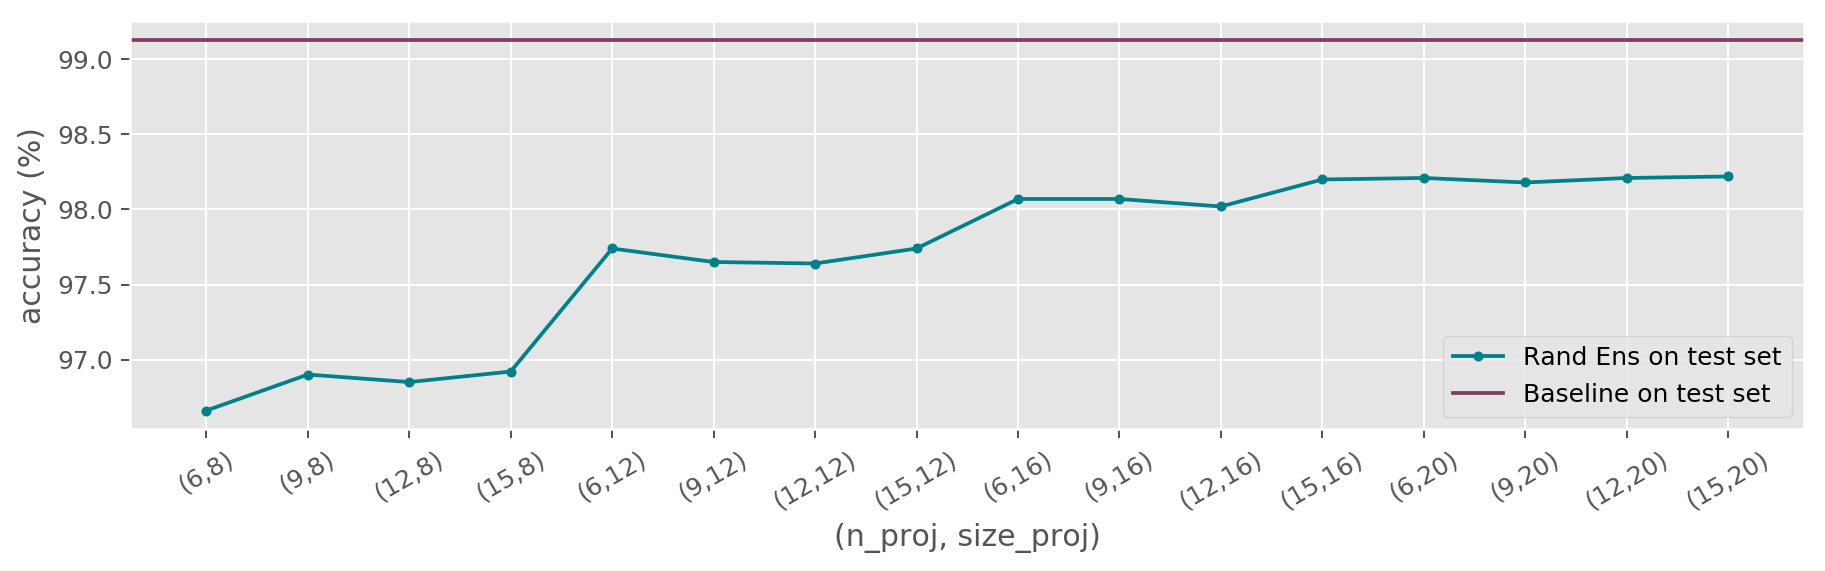

In [2]:
# random ensemble accuracy vs evaluation set
xlab = ["(6,8)","(9,8)","(12,8)","(15,8)",
        "(6,12)","(9,12)","(12,12)","(15,12)",
        "(6,16)","(9,16)","(12,16)","(15,16)",
        "(6,20)","(9,20)","(12,20)","(15,20)",]
x = range(16)
baseline_test = 99.13
random_test = [96.66,96.90,96.85,96.92,97.74,97.65,97.64,97.74,98.07,98.07,98.02,98.20,98.21,98.18,98.21,98.22]
figure(figsize=(12, 3), dpi=180, facecolor='w', edgecolor='k')

plt.plot(x,random_test,color='#00818a',label='Rand Ens on test set', marker=".")
plt.axhline(y=baseline_test,color='#843b62',label='Baseline on test set')
plt.xlabel('(n_proj, size_proj)')
plt.ylabel('accuracy (%)')
plt.xticks(x, xlab, rotation=30) 
plt.legend()

#plt.title("Random Ensemble vs Baseline model accuracy on test set")
plt.show()

## Adversarial accuracy

In [60]:
# test, fgsm, pdg, deepfool, carlini_linf
baseline = [99.13,5.91,0.71,34.83,28.96]
fgsm_robust_baseline = [99.06,98.91,32.55,96.08,95.82]
pgd_robust_baseline = [99.10,44.60,99.02,98.34,97.19]
deepfool_robust_baseline = [99.03,23.11,35.55,99.20,95.70]
carlini_robust_baseline = [99.10,14.74,3.85,94.63,99.06]

random_test = [       
96.60, 
96.90, 
97.03, 
97.05, 
97.73, 
97.72, 
97.74, 
97.74, 
97.92, 
98.04, 
98.08, 
98.13, 
98.30, 
98.30, 
98.31, 
98.33]
random_fgsm = [
    28.74, 
30.41, 
30.93, 
32.30, 
30.07, 
30.40, 
30.38, 
31.04, 
28.14, 
28.20, 
27.90, 
27.97, 
24.75, 
24.58, 
24.75, 
25.03
    ]
random_deepf = [93.65, 
94.11, 
94.39, 
94.52, 
95.59, 
95.68, 
95.92, 
95.80, 
96.15, 
96.37, 
96.52, 
96.53, 
96.44, 
96.59, 
96.65, 
96.77  ]
random_pgd = [
    63.38,
62.58,
63.56,
64.75,
61.37,
62.05,
62.85,
63.84,
58.40,
58.65,
59.79,
60.94,
55.75,
56.88,
57.58,
57.56 
]
random_carlini_linf = [         
 92.20,  
 93.17,  
 93.45,  
 93.53,  
 94.19,  
 94.34,  
 94.47,  
 94.56,  
 94.60,  
 95.09,  
 95.17,  
 95.23,  
 95.36,  
 95.56,  
 95.53,  
 95.62]

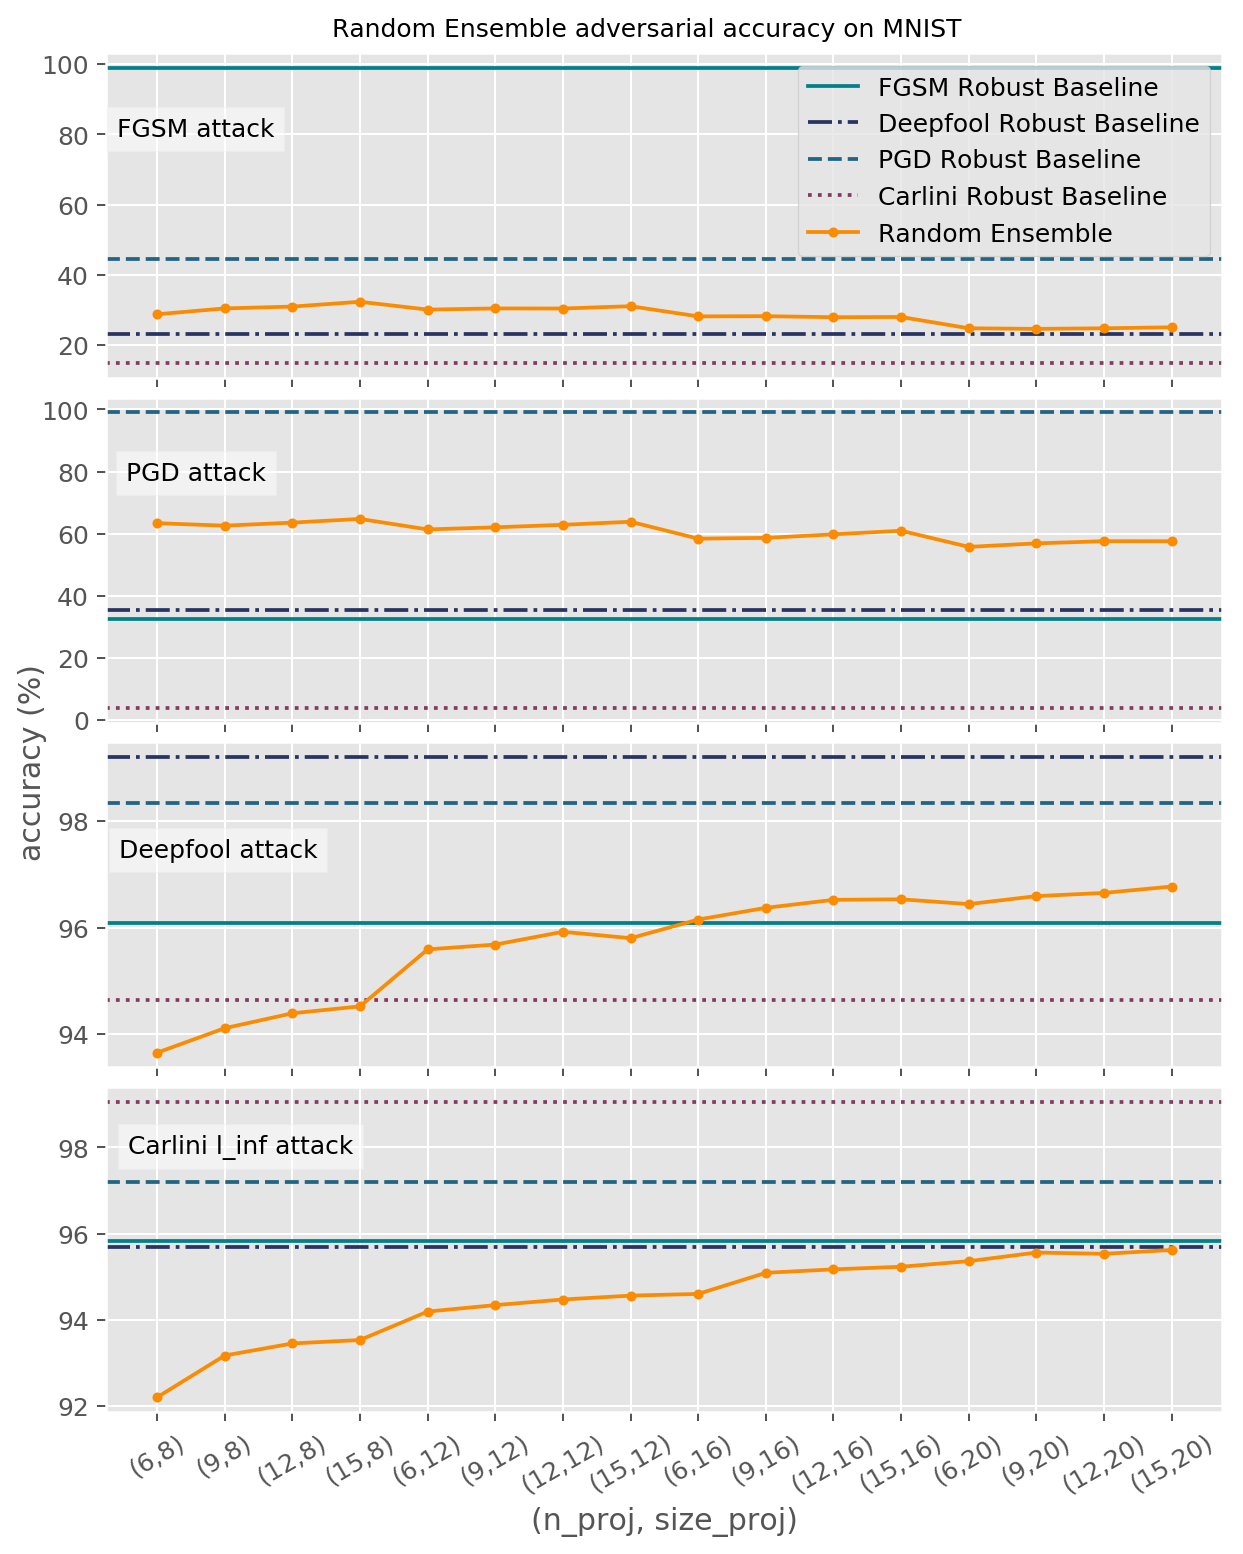

In [61]:
# random ensemble accuracy vs evaluation set


xlab = ["(6,8)","(9,8)","(12,8)","(15,8)",
        "(6,12)","(9,12)","(12,12)","(15,12)",
        "(6,16)","(9,16)","(12,16)","(15,16)",
        "(6,20)","(9,20)","(12,20)","(15,20)",]
x = range(16)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(8, 10), dpi=180)
plt.ylabel('accuracy (%)', position=(0.5,2))
plt.xlabel('(n_proj, size_proj)')
plt.xticks(x, xlab, rotation=30) 
fig.subplots_adjust(hspace=0.06)

#ax1.axhline(y=baseline_fgsm, color="#293462", label='Baseline on FGSM', ls="dashed", linewidth=1)
ax1.axhline(y=fgsm_robust_baseline[1], color="#00818a", label='FGSM Robust Baseline')
ax1.axhline(y=deepfool_robust_baseline[1], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax1.axhline(y=pgd_robust_baseline[1], color="#216583", label='PGD Robust Baseline', ls="--")
ax1.axhline(y=carlini_robust_baseline[1], color="#843b62", label='Carlini Robust Baseline', ls=":")
ax1.plot(x,random_fgsm,color="#FB8B00",label='Random Ensemble', marker=".")
ax1.legend(loc='best')
ax1.set_title("FGSM attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.08, y=0.7,
             bbox=dict(facecolor='white', alpha=0.5))


#ax2.axhline(y=baseline_pgd, color="#293462",label='Baseline on PGD',  ls="dashed", linewidth=1)
ax2.axhline(y=fgsm_robust_baseline[2], color="#00818a",label='FGSM Robust Baseline')
ax2.axhline(y=deepfool_robust_baseline[2], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax2.axhline(y=pgd_robust_baseline[2], color="#216583", label='PGD Robust Baseline', ls="--")
ax2.axhline(y=carlini_robust_baseline[2], color="#843b62", label='Carlini Robust Baseline', ls=":")
ax2.plot(x,random_pgd,color="#FB8B00",label='Random Ensemble', marker=".") ##00818a
#ax2.legend(loc='best', title="PGD attack")#,bbox_to_anchor=(0.65, 0.5, 0.5, 0.5))
ax2.set_title("PGD attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.08, y=0.7,
             bbox=dict(facecolor='white', alpha=0.5))

#ax3.axhline(y=baseline_deepf, color="#293462",label='Baseline on DeepFool',  ls="dashed", linewidth=1)
ax3.axhline(y=fgsm_robust_baseline[3], color="#00818a",label='FGSM Robust Baseline')
ax3.axhline(y=deepfool_robust_baseline[3], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax3.axhline(y=pgd_robust_baseline[3], color="#216583", label='PGD Robust Baseline', ls="--")
ax3.axhline(y=carlini_robust_baseline[3], color="#843b62", label='Carlini Robust Baseline', ls=":")
ax3.plot(x,random_deepf,color="#FB8B00",label='Random Ensemble', marker=".") ##00818a
#ax3.legend(loc='best', title="Deepfool attack")#,bbox_to_anchor=(0.65, 0.5, 0.5, 0.5))
ax3.set_title("Deepfool attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.1, y=0.6,
             bbox=dict(facecolor='white', alpha=0.5))

#ax4.axhline(y=baseline_carlini_linf, color="#293462",label='Baseline on Carlini',  ls="dashed", linewidth=1)
ax4.axhline(y=fgsm_robust_baseline[4], color="#00818a",label='FGSM Robust Baseline')
ax4.axhline(y=deepfool_robust_baseline[4], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax4.axhline(y=pgd_robust_baseline[4], color="#216583", label='PGD Robust Baseline', ls="--")
ax4.axhline(y=carlini_robust_baseline[4], color="#843b62", label='Carlini Robust Baseline', ls=":")
ax4.plot(x,random_carlini_linf,color="#FB8B00",label='Random Ensemble', marker=".")
#ax4.legend(loc='best', title="Carlini l_inf attack")#,bbox_to_anchor=(0.65, 0., 0.5, 0.5))
ax4.set_title("Carlini l_inf attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.12, y=0.75,
             bbox=dict(facecolor='white', alpha=0.5))

fig.suptitle("Random Ensemble adversarial accuracy on MNIST", fontsize=10, y=0.9)
fig.show()

In [ ]:
# test, fgsm, pdg, deepfool, carlini_linf
baseline = [99.13,5.91,0.71,34.83,28.96]
fgsm_robust_baseline = [99.06,98.91,32.55,96.08,95.82]
pgd_robust_baseline = [99.10,44.60,99.02,98.34,97.19]
deepfool_robust_baseline = [99.03,23.11,35.55,99.20,95.70]
carlini_robust_baseline = [99.10,14.74,3.85,94.63,99.06]

random_test = [       
96.60, 
96.90, 
97.03, 
97.05, 
97.73, 
97.72, 
97.74, 
97.74, 
97.92, 
98.04, 
98.08, 
98.13, 
98.30, 
98.30, 
98.31, 
98.33]
random_fgsm = [
    28.74, 
30.41, 
30.93, 
32.30, 
30.07, 
30.40, 
30.38, 
31.04, 
28.14, 
28.20, 
27.90, 
27.97, 
24.75, 
24.58, 
24.75, 
25.03
    ]
random_deepf = [93.65, 
94.11, 
94.39, 
94.52, 
95.59, 
95.68, 
95.92, 
95.80, 
96.15, 
96.37, 
96.52, 
96.53, 
96.44, 
96.59, 
96.65, 
96.77  ]
random_pgd = [
    63.38,
62.58,
63.56,
64.75,
61.37,
62.05,
62.85,
63.84,
58.40,
58.65,
59.79,
60.94,
55.75,
56.88,
57.58,
57.56 
]
random_carlini_linf = [         
 92.20,  
 93.17,  
 93.45,  
 93.53,  
 94.19,  
 94.34,  
 94.47,  
 94.56,  
 94.60,  
 95.09,  
 95.17,  
 95.23,  
 95.36,  
 95.56,  
 95.53,  
 95.62]

In [ ]:
# data
baseline_fgsm = 24.17
baseline_deepf = 56.80
baseline_pgd = 12.58
random_test = [96.66,96.90,96.85,96.92,97.74,97.65,97.64,97.74,98.07,98.07,98.02,98.20,98.21,98.18,98.21,98.22]
random_fgsm = [55.39,58.80,56.95,58.61,60.65,57.79,61.22,60.72,59.67,60.44,61.74,62.01,59.17,59.29,59.90,61.22]
random_deepf = [95.99,96.29,96.20,96.42,97.05,97.12,97.22,97.19,97.62,97.71,97.82,97.69,97.83,97.80,97.91,97.88]
random_pgd = [77.84,79.18,79.61,80.75,80.46,80.20,82.69,82.94,78.55,79.30,79.45,79.55,79.22,78.83,79.64,79.98]

# xticks
x = range(16)
xlab = ["(6,8)","(9,8)","(12,8)","(15,8)",
        "(6,12)","(9,12)","(12,12)","(15,12)",
        "(6,16)","(9,16)","(12,16)","(15,16)",
        "(6,20)","(9,20)","(12,20)","(15,20)",]

# plots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=False,  figsize=(12, 3), dpi=180)
#fig.suptitle("Random Ensemble vs Baseline accuracy on the adversaries", size=14)

ax1.set_title("FGSM attacks", size=12)
ax1.plot(x,random_fgsm,color="r",label='Rand Ens')
ax1.axhline(y=baseline_fgsm, color="darkred", label='Baseline')
ax1.legend(loc='best',bbox_to_anchor=(0.5, 0., 0.5, 0.5))
ax1.set_xticks(x, xlab) 
ax1.set_xticklabels(xlab, rotation=45)

ax2.set_title("DeepFool attacks", size=12)
ax2.plot(x,random_deepf,color="dodgerblue",label='Rand Ens')
ax2.axhline(y=baseline_deepf, color="darkblue",label='Baseline')
ax2.legend(loc='best',bbox_to_anchor=(0.5, 0., 0.5, 0.5))
ax2.set_xticks(x, xlab) 
ax2.set_xticklabels(xlab, rotation=45)

ax3.set_title("PGD attacks", size=12)
ax3.plot(x,random_pgd,color="limegreen",label='Rand Ens')
ax3.axhline(y=baseline_pgd, color="darkgreen",label='Baseline')
ax3.legend(loc='best',bbox_to_anchor=(0.5, 0., 0.5, 0.5))
ax3.set_xticks(x, xlab) 
ax3.set_xticklabels(xlab, rotation=45)

plt.ylabel('accuracy (%)', position=(0.5,0.5))
plt.xlabel('(n_proj, size_proj)', position=(0.5,0))
fig.show()

## Complexity mnist

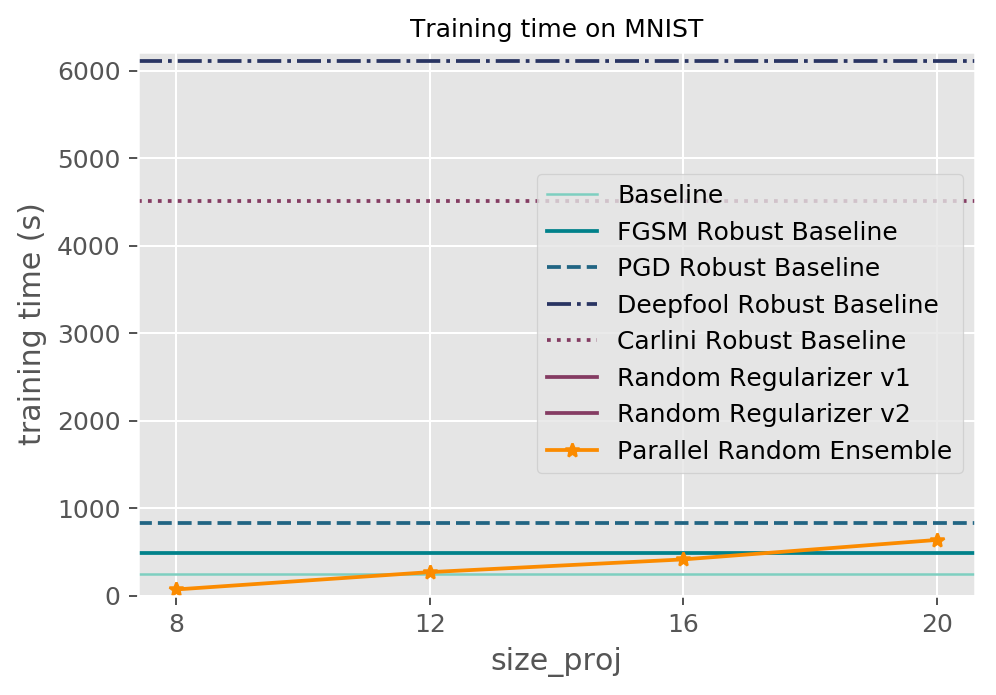

In [78]:
# random ensemble accuracy vs evaluation set

xlab = ["8","12","16","20"]
x = range(4)

# plain, fgsm, pgd, deepfool, carlini_linf
baseline = [244.64,486.45,833.16,6116.33,4507.31]

randens_times_old = [161.56358885765076, 244.69218850135803, 330.3099126815796, 449.8663718700409,
                 306.13498520851135, 462.9905071258545, 614.2709856033325, 754.4713060855865,
                 481.06000685691833, 730.0027039051056, 969.5257754325867, 1202.7333579063416,
                 713.6330585479736, 1042.581505537033, 1423.9588317871094, 1784.10049700737]

randens_times = [1045.2583463191986,
2555.6296741962433, 
3144.4848911762238, 
1316.7294340133667, 
2173.0551035404205, 
6833.772572278976,  
8294.763188838959,  
12240.271400928497, 
3718.577780723572,  
14803.005425453186, 
27848.05566883087,  
23362.26087665558,  
5714.933403015137,  
17924.82506251335,  
26164.82797217369,  
26257.255435466766 ]

par_randens_times = [ 69.18349480628967,267.5957431793213,412.77997064590454,635.8284521102905]

figure(num=None, figsize=(6, 4), dpi=180, facecolor='w', edgecolor='k')
plt.axhline(y=baseline[0], color='#7ecfc0', label='Baseline', linewidth=1)
plt.axhline(y=baseline[1], color="#00818a", label='FGSM Robust Baseline', ls="-")
plt.axhline(y=baseline[2], color="#216583", label='PGD Robust Baseline', ls="--")
plt.axhline(y=baseline[3], color="#293462", label='Deepfool Robust Baseline', ls="-.")
plt.axhline(y=baseline[4], color="#843b62", label='Carlini Robust Baseline', ls=":")

plt.axhline(y=randreg_times[1], color="#843b62", label='Random Regularizer v1')
plt.axhline(y=randreg_times[2], color="#843b62", label='Random Regularizer v2')
#plt.plot(x,randens_times,color='#00818a',label='Serial Random Ensemble', marker=".")
#plt.plot(x,par_randens_times,color='#293462',label='Parallel Random Ensemble', marker="*")
plt.plot(x,par_randens_times,color='#FB8B00',label='Parallel Random Ensemble', marker="*")
#plt.yscale("log")



plt.xlabel('size_proj')
plt.ylabel('training time (s)')
plt.xticks(x, xlab, rotation=0) 
plt.ylim([0, baseline[3]+100])
plt.legend(loc='center right')
plt.title("Training time on MNIST",fontsize=10)
plt.show()

## Cifar complexity 80 epochs

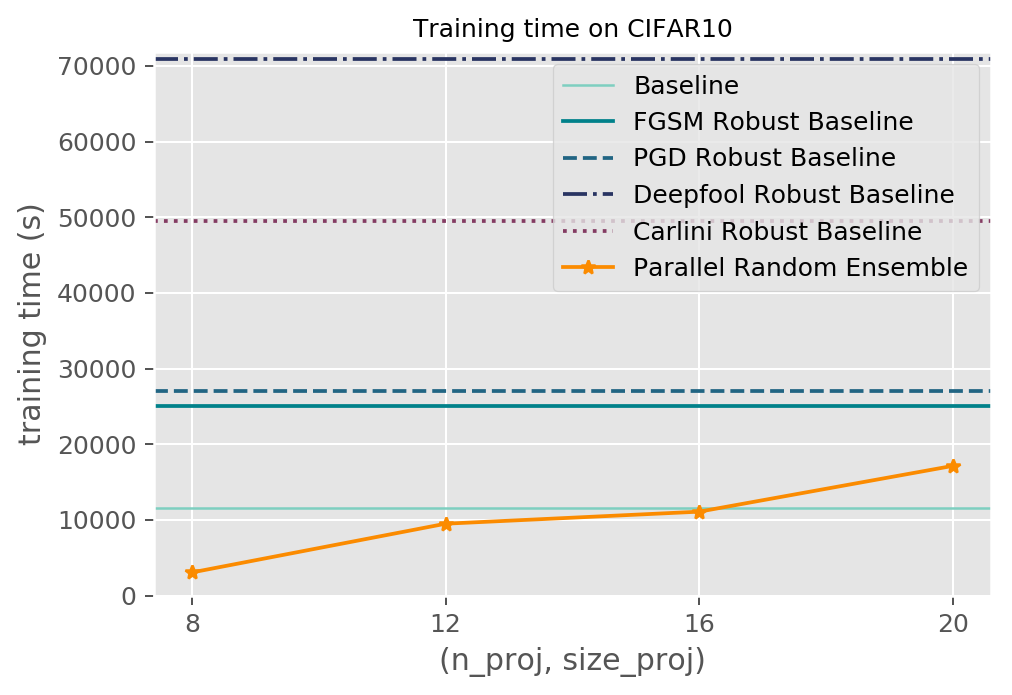

In [39]:
# random ensemble accuracy vs evaluation set


xlab = ["8","12","16","20"]
x = range(4)

# plain, fgsm, pgd, deepfool, carlini_linf
baseline = [11555.19160747528,25108.290491104126,27043.505586862564,70846.34929156303,49535.69976067543]

randens_times = [ ]

par_randens_times = [ 3050.729281425476, 9490.245878458023,  11081.634799718857,17134.651045799255]

figure(num=None, figsize=(6, 4), dpi=180, facecolor='w', edgecolor='k')
plt.axhline(y=baseline[0], color='#7ecfc0', label='Baseline', linewidth=1)
plt.axhline(y=baseline[1], color="#00818a", label='FGSM Robust Baseline', ls="-")
plt.axhline(y=baseline[2], color="#216583", label='PGD Robust Baseline', ls="--")
plt.axhline(y=baseline[3], color="#293462", label='Deepfool Robust Baseline', ls="-.")
plt.axhline(y=baseline[4], color="#843b62", label='Carlini Robust Baseline', ls=":")

#plt.plot(x,randens_times,color='#00818a',label='Serial Random Ensemble', marker=".")
#plt.plot(x,par_randens_times,color='#293462',label='Parallel Random Ensemble', marker="*")
plt.plot(x,par_randens_times,color='#FB8B00',label='Parallel Random Ensemble', marker="*")
#plt.yscale("log")



plt.xlabel('(n_proj, size_proj)')
plt.ylabel('training time (s)')
plt.xticks(x, xlab, rotation=0) 
plt.ylim([0, baseline[3]+1000])
plt.legend(loc='upper right')
plt.title("Training time on CIFAR10",fontsize=10)
plt.show()

## MNIST randreg accuracy

In [8]:
# test, fgsm, pdg, deepfool, carlini_linf
baseline = [99.13,5.91,0.71,34.83,28.96]
fgsm_robust_baseline = [99.06,98.91,32.55,96.08,95.82]
pgd_robust_baseline = [99.10,44.60,99.02,98.34,97.19]
deepfool_robust_baseline = [99.03,23.11,35.55,99.20,95.70]
carlini_robust_baseline = [99.10,14.74,3.85,94.63,99.06]

random_test = [95.30,  95.52 ,98.65,97.97    ]
random_fgsm = [ 35.44,36.25, 12.53,19.96    ]
random_pgd = [  68.96, 69.81 ,2.16,34.20        ]
random_deepf = [ 91.60 ,91.70 ,91.86,  94.01 ]
random_carlini_linf = [ 89.69,  89.54, 83.80, 90.92 ] 

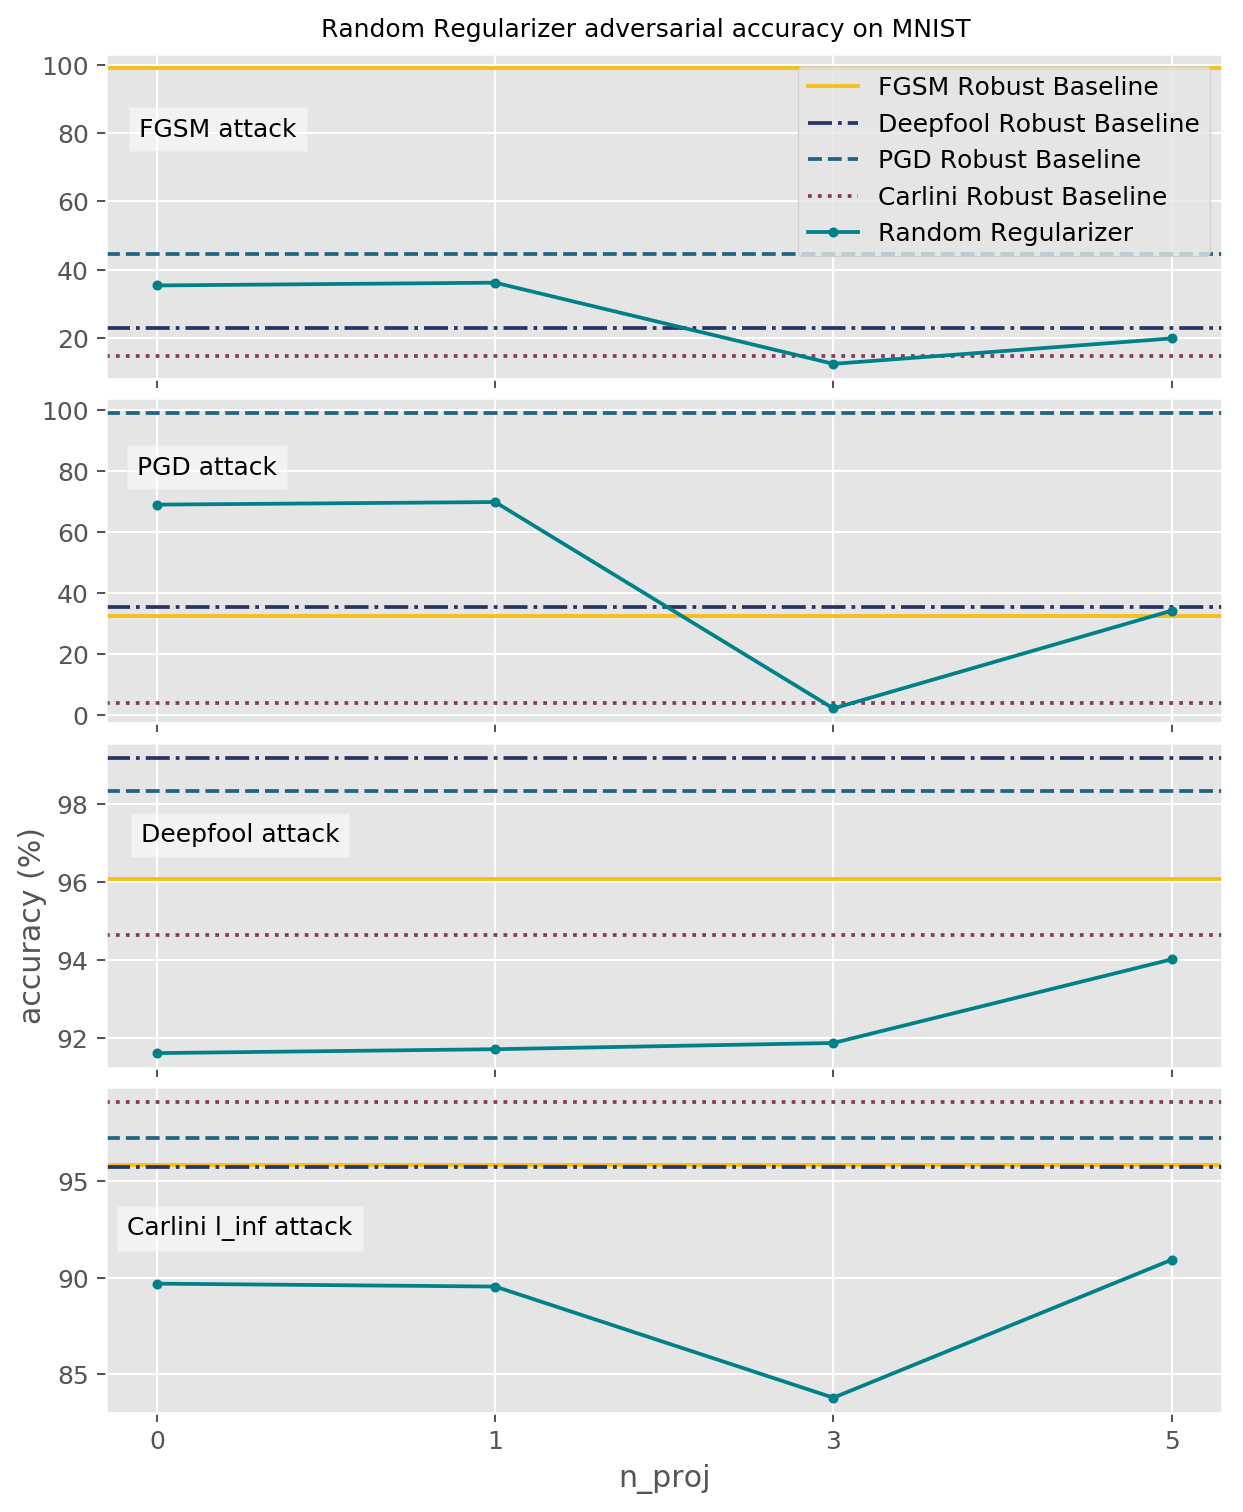

In [26]:
# random ensemble accuracy vs evaluation set


xlab = ["0","1","3","5"]
x = range(4)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(16, 10), dpi=180)
plt.ylabel('accuracy (%)', position=(0.5,1.5))
plt.xlabel('n_proj')
plt.xticks(x, xlab, rotation=0) 
fig.subplots_adjust(hspace=0.06)

#ax1.axhline(y=baseline[1], color="#293462", label='Baseline on FGSM', ls="dashed", linewidth=1)
ax1.axhline(y=fgsm_robust_baseline[1], color="#f7be16", label='FGSM Robust Baseline')
ax1.axhline(y=deepfool_robust_baseline[1], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax1.axhline(y=pgd_robust_baseline[1], color="#216583", label='PGD Robust Baseline', ls="--")
ax1.axhline(y=carlini_robust_baseline[1], color="#843b62", label='Carlini Robust Baseline', ls=":")
ax1.plot(x,random_fgsm,color="#00818a",label='Random Regularizer', marker=".")
ax1.legend(loc='upper right')
ax1.set_title("FGSM attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.1, y=0.7,
             bbox=dict(facecolor='white', alpha=0.5))


#ax2.axhline(y=baseline[2], color="#293462",label='Baseline on PGD',  ls="dashed", linewidth=1)
ax2.axhline(y=fgsm_robust_baseline[2], color="#f7be16",label='FGSM Robust Baseline')
ax2.axhline(y=deepfool_robust_baseline[2], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax2.axhline(y=pgd_robust_baseline[2], color="#216583", label='PGD Robust Baseline', ls="--")
ax2.axhline(y=carlini_robust_baseline[2], color="#843b62", label='Carlini Robust Baseline', ls=":")
ax2.plot(x,random_pgd,color="#00818a",label='Random Regularizer', marker=".")
#ax2.legend(loc='best', title="PGD attack")#,bbox_to_anchor=(0.65, 0.5, 0.5, 0.5))
ax2.set_title("PGD attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.09, y=0.72,
             bbox=dict(facecolor='white', alpha=0.5))

#ax3.axhline(y=baseline[3], color="#293462",label='Baseline on DeepFool',  ls="dashed", linewidth=1)
ax3.axhline(y=fgsm_robust_baseline[3], color="#f7be16",label='FGSM Robust Baseline')
ax3.axhline(y=deepfool_robust_baseline[3], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax3.axhline(y=pgd_robust_baseline[3], color="#216583", label='PGD Robust Baseline', ls="--")
ax3.axhline(y=carlini_robust_baseline[3], color="#843b62", label='Carlini Robust Baseline', ls=":")
ax3.plot(x,random_deepf,color="#00818a",label='Random Regularizer', marker=".")
#ax3.legend(loc='best', title="Deepfool attack")#,bbox_to_anchor=(0.65, 0.5, 0.5, 0.5))
ax3.set_title("Deepfool attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.12, y=0.65,
             bbox=dict(facecolor='white', alpha=0.5))

#ax4.axhline(y=baseline[4], color="#293462",label='Baseline on Carlini',  ls="dashed", linewidth=1)
ax4.axhline(y=fgsm_robust_baseline[4], color="#f7be16",label='FGSM Robust Baseline')
ax4.axhline(y=deepfool_robust_baseline[4], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax4.axhline(y=pgd_robust_baseline[4], color="#216583", label='PGD Robust Baseline', ls="--")
ax4.axhline(y=carlini_robust_baseline[4], color="#843b62", label='Carlini Robust Baseline', ls=":")
ax4.plot(x,random_carlini_linf,color="#00818a",label='Random Regularizer', marker=".")
#ax4.legend(loc='best', title="Carlini l_inf attack")#,bbox_to_anchor=(0.65, 0., 0.5, 0.5))
ax4.set_title("Carlini l_inf attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.12, y=0.5,
             bbox=dict(facecolor='white', alpha=0.5))

fig.suptitle("Random Regularizer adversarial accuracy on MNIST", fontsize=10, y=0.9)
fig.show()

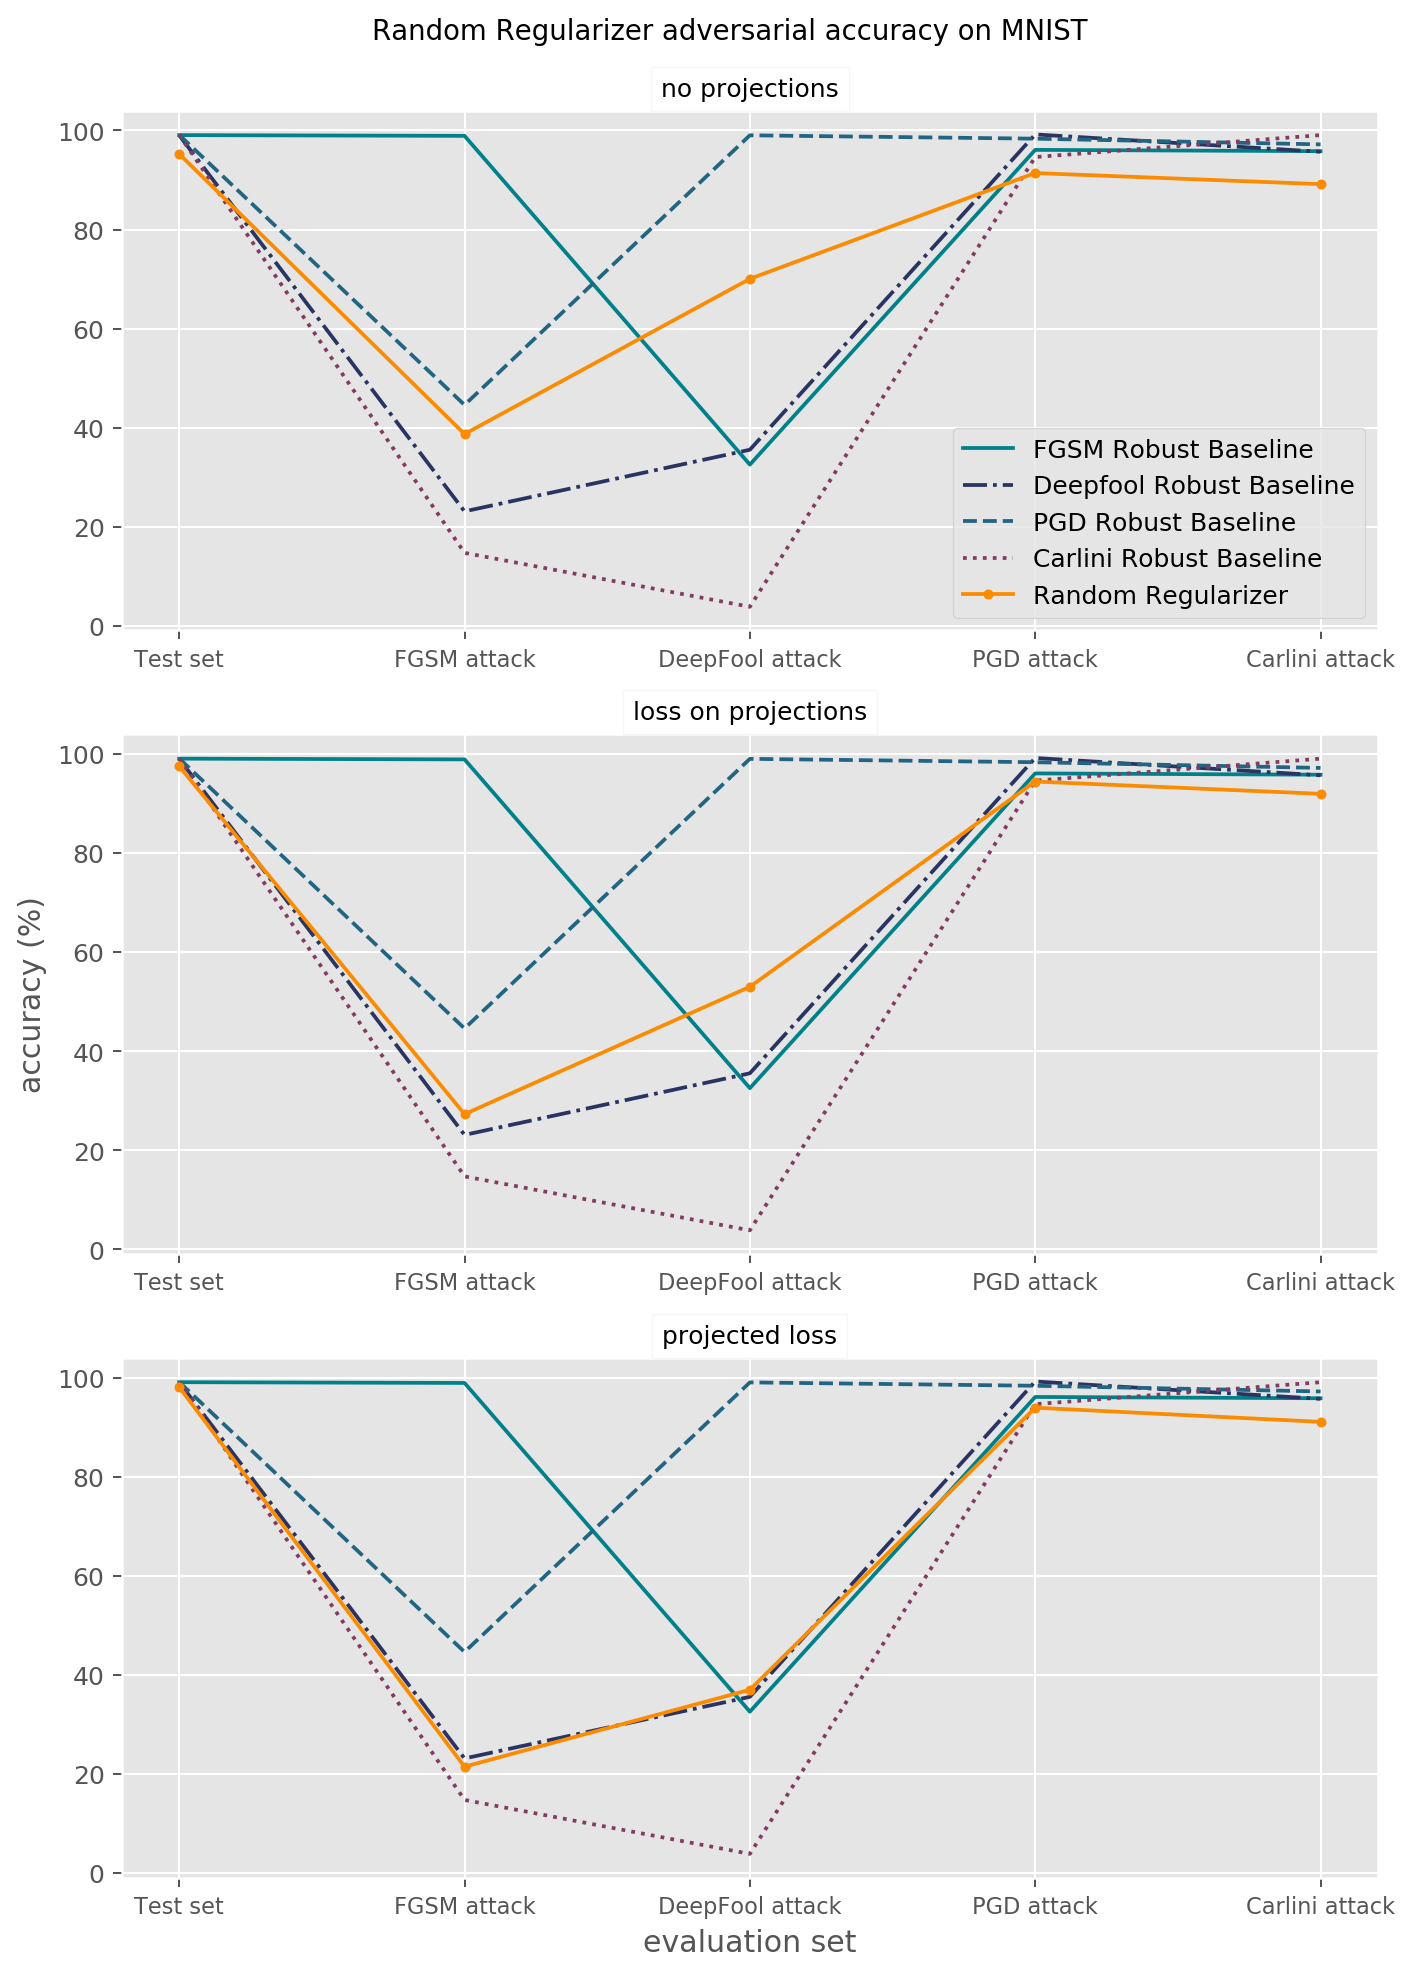

In [80]:
# random ensemble accuracy vs evaluation set
# test, fgsm, pdg, deepfool, carlini_linf
#baseline = [99.13,5.91,0.71,34.83,28.96]
fgsm_robust_baseline = [99.06,98.91,32.55,96.08,95.82]
pgd_robust_baseline = [99.10,44.60,99.02,98.34,97.19]
deepfool_robust_baseline = [99.03,23.11,35.55,99.20,95.70]
carlini_robust_baseline = [99.10,14.74,3.85,94.63,99.06]

# questi valori sono tutti falsi!! devo ancora inserire quelli veri
randreg_noproj = [95.26,   38.72 ,  70.05  , 91.40  , 89.16]
randreg_lossonproj = [ 97.53,   27.30 ,  53.01  , 94.44  , 91.96  ]
randreg_projloss = [ 98.06,   21.45 ,  36.98  , 93.92  , 91.05 ]

xlab = ["Test set","FGSM attack","DeepFool attack","PGD attack","Carlini attack"]
x = range(len(xlab))

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=False, figsize=(9, 13), dpi=180)
#plt.xticks(x, xlab, rotation=0) 
xticks_fontsize=9

ax1.plot(x, fgsm_robust_baseline, color="#00818a", label='FGSM Robust Baseline')
ax1.plot(x, deepfool_robust_baseline, color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax1.plot(x, pgd_robust_baseline, color="#216583", label='PGD Robust Baseline', ls="--")
ax1.plot(x, carlini_robust_baseline, color="#843b62", label='Carlini Robust Baseline', ls=":")
ax1.plot(x,randreg_noproj,color="#FB8B00",label='Random Regularizer', marker=".")
ax1.set_xticks(x)
ax1.set_xticklabels(xlab, fontsize=xticks_fontsize)
ax1.legend(loc='lower right')
ax1.set_title("no projections", fontdict={'fontsize': 10, 'fontweight': 'medium'}, loc='center',
             bbox=dict(facecolor='white', alpha=0.5))

ax2.plot(x, fgsm_robust_baseline, color="#00818a", label='FGSM Robust Baseline')
ax2.plot(x, deepfool_robust_baseline, color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax2.plot(x, pgd_robust_baseline, color="#216583", label='PGD Robust Baseline', ls="--")
ax2.plot(x, carlini_robust_baseline, color="#843b62", label='Carlini Robust Baseline', ls=":")
ax2.plot(x,randreg_lossonproj,color="#FB8B00",label='Random Regularizer', marker=".")
ax2.set_xticks(x)
ax2.set_xticklabels(xlab, fontsize=xticks_fontsize)
ax2.set_title("loss on projections", fontdict={'fontsize': 10, 'fontweight': 'medium'},  loc='center',
             bbox=dict(facecolor='white', alpha=0.5))

ax3.plot(x, fgsm_robust_baseline, color="#00818a", label='FGSM Robust Baseline')
ax3.plot(x, deepfool_robust_baseline, color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax3.plot(x, pgd_robust_baseline, color="#216583", label='PGD Robust Baseline', ls="--")
ax3.plot(x, carlini_robust_baseline, color="#843b62", label='Carlini Robust Baseline', ls=":")
ax3.plot(x,randreg_projloss,color="#FB8B00",label='Random Regularizer', marker=".")
ax3.set_xticks(x)
ax3.set_xticklabels(xlab, fontsize=xticks_fontsize) 
ax3.set_title("projected loss", fontdict={'fontsize': 10, 'fontweight': 'medium'}, loc='center',
             bbox=dict(facecolor='white', alpha=0.5))

plt.ylabel('accuracy (%)', position=(0.5,1.7))
plt.xlabel('evaluation set', position=(0.5,0.8), fontsize=12)
fig.suptitle("Random Regularizer adversarial accuracy on MNIST", fontsize=11, y=0.92)
fig.show()

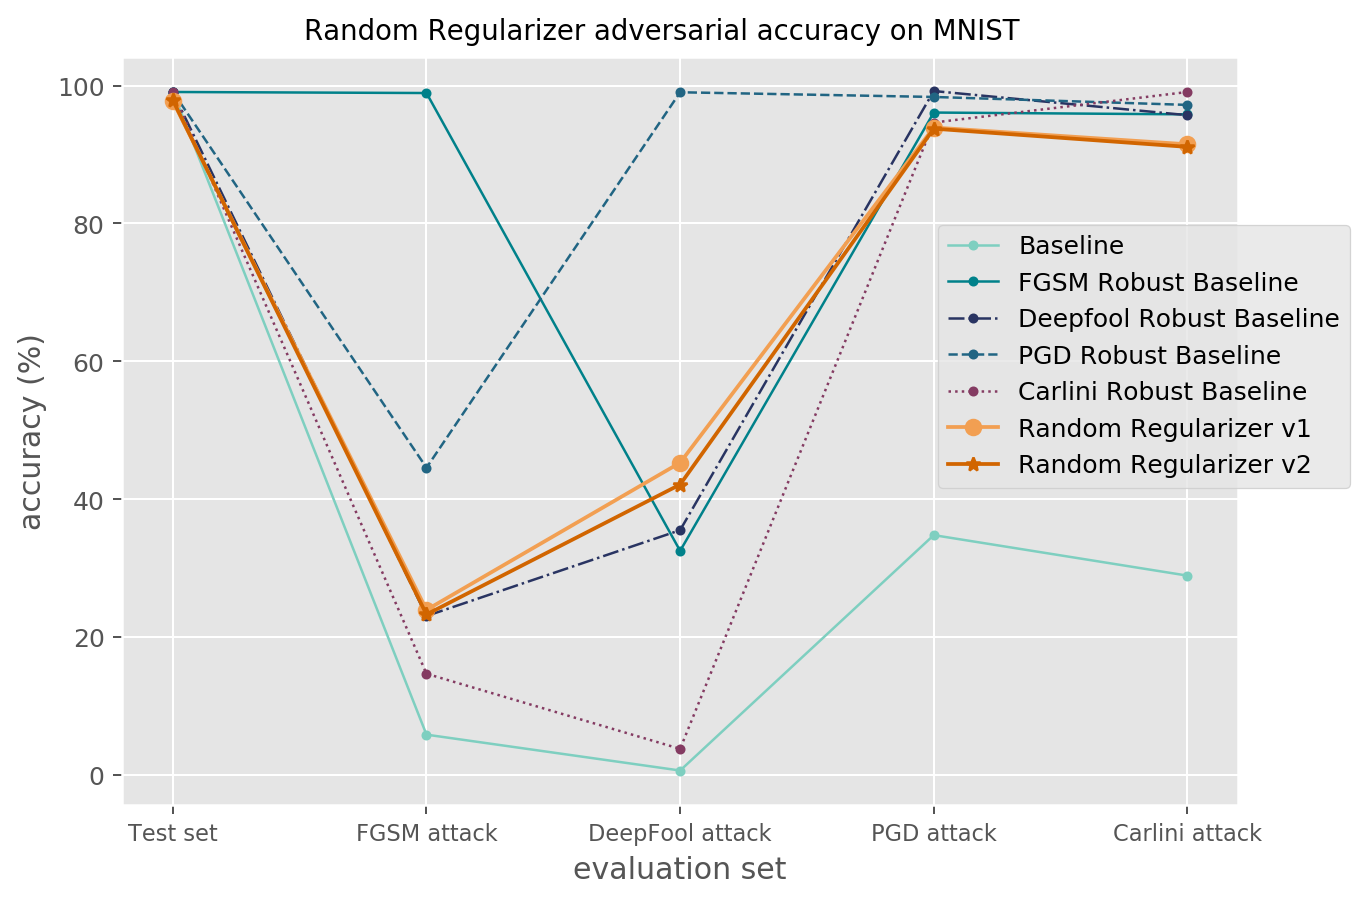

In [81]:
# random ensemble accuracy vs evaluation set
# test, fgsm, pdg, deepfool, carlini_linf
baseline = [99.13,5.91,0.71,34.83,28.96]
fgsm_robust_baseline = [99.06,98.91,32.55,96.08,95.82]
pgd_robust_baseline = [99.10,44.60,99.02,98.34,97.19]
deepfool_robust_baseline = [99.03,23.11,35.55,99.20,95.70]
carlini_robust_baseline = [99.10,14.74,3.85,94.63,99.06]

randreg_noproj_lam = [[94.90,   38.17,   69.67,   90.89,   89.07 ],[95.26,   38.72,   70.05,   91.40,   89.16],[95.59,   35.85,   67.28,   91.68,   89.92]]
randreg_lossonproj_lam = [[97.92 ,  22.53 ,  39.65 ,  93.24  , 90.75 ],[ 97.53,   27.30 ,  53.01  , 94.44  , 91.96 ],[97.80 ,  22.14,   43.32,   94.05,   91.73  ] ]
randreg_projloss_lam = [[97.82 ,  23.68 ,  43.07  , 93.86   ,91.56 ],[ 98.06,   21.45 ,  36.98  , 93.92  , 91.05],[ 97.69 ,  24.87  , 46.45 ,  93.45  , 90.70  ] ]

randreg_noproj = np.mean(randreg_noproj_lam, axis=0)
randreg_lossonproj = np.mean(randreg_lossonproj_lam, axis=0)
randreg_projloss = np.mean(randreg_projloss_lam, axis=0)

xlab = ["Test set","FGSM attack","DeepFool attack","PGD attack","Carlini attack"]
x = range(len(xlab))

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=False, figsize=(8, 5.5), dpi=180)
#plt.xticks(x, xlab, rotation=0) 
xticks_fontsize=9

ax.plot(x, baseline, color="#7ecfc0", label='Baseline', lw=1, marker='.')

ax.plot(x, fgsm_robust_baseline, color="#00818a", label='FGSM Robust Baseline', lw=1, marker='.')
ax.plot(x, deepfool_robust_baseline, color="#293462", label='Deepfool Robust Baseline', ls="-.",lw=1, marker='.')
ax.plot(x, pgd_robust_baseline, color="#216583", label='PGD Robust Baseline', ls="--",lw=1, marker='.')
ax.plot(x, carlini_robust_baseline, color="#843b62", label='Carlini Robust Baseline', ls=":",lw=1, marker='.')

#ax.plot(x,randreg_noproj,color="#f29f52",label='Random Regularizer v0', marker="^")
ax.plot(x,randreg_lossonproj,color="#f29f52",label='Random Regularizer v1', marker="o") ##f37700
ax.plot(x,randreg_projloss,color="#d16500",label='Random Regularizer v2', marker="*")
ax.set_xticks(x)
ax.set_xticklabels(xlab, fontsize=xticks_fontsize)
ax.legend(bbox_to_anchor=(0.72,0.6)) #loc="best"
#ax.set_title("no projections", fontdict={'fontsize': 10, 'fontweight': 'medium'}, loc='center',
#             bbox=dict(facecolor='white', alpha=0.5))

plt.ylabel('accuracy (%)', position=(0.5,0.5))
plt.xlabel('evaluation set', position=(0.5,0.8), fontsize=12)
fig.suptitle("Random Regularizer adversarial accuracy on MNIST", fontsize=11, y=0.92)
fig.show()

## cifar randens 

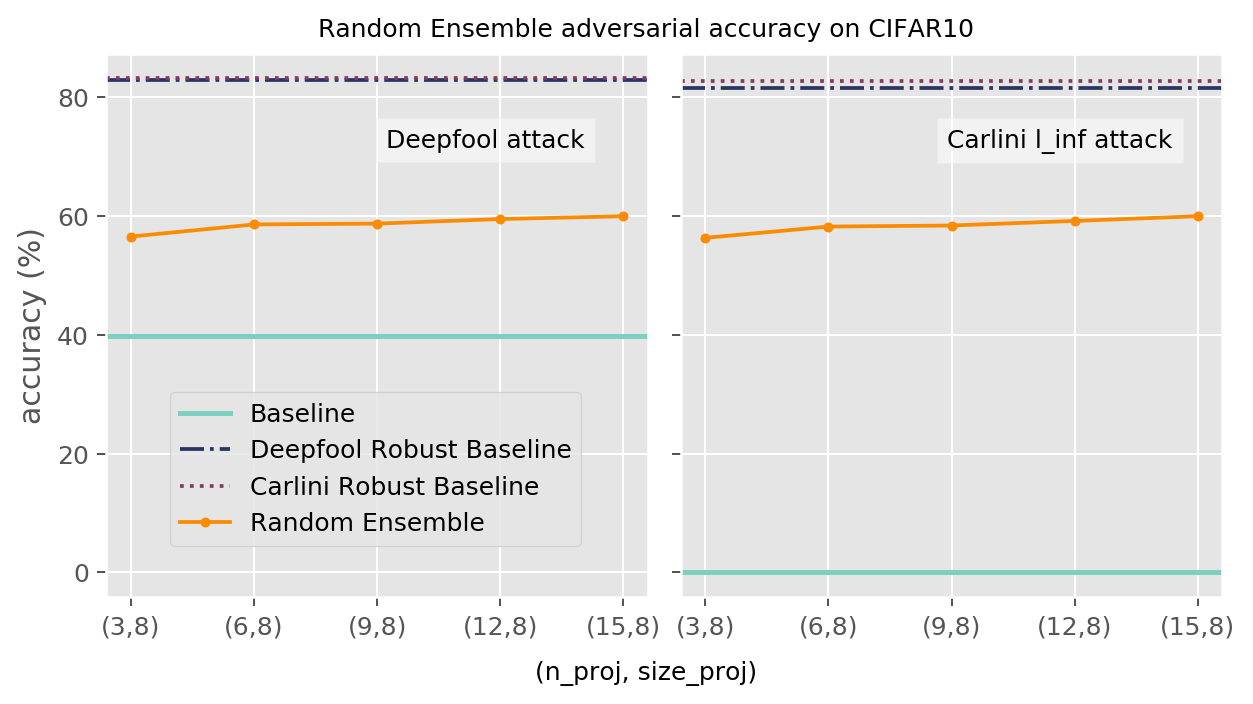

In [97]:
# random ensemble accuracy vs evaluation set
baseline = [39.77 ,  0.00]
deepfool_robust_baseline = [83.01,   81.67]
carlini_robust_baseline = [83.23 ,  82.79]
random_deepf = [56.58, 58.62 ,58.76 ,59.53 , 60]
random_carlini = [ 56.36 , 58.26  , 58.44 , 59.21 ,60  ]

xlab = ["(3,8)","(6,8)","(9,8)","(12,8)","(15,8)"]
x = range(5)

fig, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True, figsize=(8, 4), dpi=180)
#xlabel('(n_proj, size_proj)',bbox_to_anchor=(0.5,0.5))
fig.text(0.5, 0.01, '(n_proj, size_proj)', ha='center')
fig.subplots_adjust(wspace=0.06)

ax3.axhline(y=baseline[0], color="#7ecfc0",label='Baseline', linewidth=2)
ax3.axhline(y=deepfool_robust_baseline[0], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax3.axhline(y=carlini_robust_baseline[0], color="#843b62", label='Carlini Robust Baseline', ls=":")
ax3.plot(x,random_deepf,color="#FB8B00",label='Random Ensemble', marker=".") ##00818a
ax3.set_title("Deepfool attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.7, y=0.8,
             bbox=dict(facecolor='white', alpha=0.5))
ax3.set_ylabel('accuracy (%)')# position=(0.1,0.5))
ax3.legend(bbox_to_anchor=(0.9, 0.4))
ax3.set_xticks(x)
ax3.set_xticklabels(xlab)

ax4.axhline(y=baseline[1], color="#7ecfc0",label='Baseline', linewidth=2)
ax4.axhline(y=deepfool_robust_baseline[1], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax4.axhline(y=carlini_robust_baseline[1], color="#843b62", label='Carlini Robust Baseline', ls=":")
ax4.plot(x,random_carlini,color="#FB8B00",label='Random Ensemble', marker=".")
ax4.set_title("Carlini l_inf attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.7, y=0.8,
             bbox=dict(facecolor='white', alpha=0.5))
ax4.set_xticks(x)
ax4.set_xticklabels(xlab)

fig.suptitle("Random Ensemble adversarial accuracy on CIFAR10", fontsize=10, y=0.93)
fig.show()

## cifar complexity 800 epochs

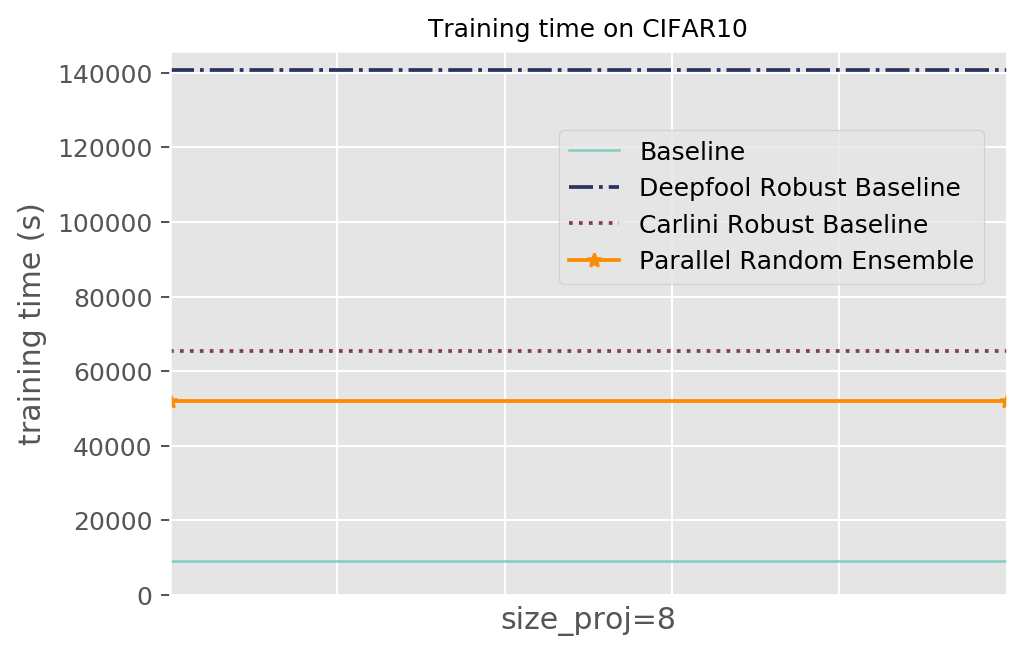

In [52]:
# random ensemble accuracy vs evaluation set

# plain, deepfool, carlini_linf
baseline = [9049.866752386093,140696.0322291851,65423.28578591347 ]
par_randens_times = [52017.7775683403]

figure(num=None, figsize=(6, 4), dpi=180, facecolor='w', edgecolor='k')
plt.axhline(y=baseline[0], color='#7ecfc0', label='Baseline', linewidth=1)
plt.axhline(y=baseline[1], color="#293462", label='Deepfool Robust Baseline', ls="-.")
plt.axhline(y=baseline[2], color="#843b62", label='Carlini Robust Baseline', ls=":")
plt.axhline(y=par_randens_times[0],color='#FB8B00',label='Parallel Random Ensemble', marker="*")
#plt.plot(x,randens_times,color='#00818a',label='Serial Random Ensemble', marker=".")
#plt.plot(x,par_randens_times,color='#293462',label='Parallel Random Ensemble', marker="*")
#plt.plot(x,par_randens_times,color='#FB8B00',label='Parallel Random Ensemble', marker="*")

plt.tick_params(axis='x',bottom=False,labelbottom=False)
plt.xlabel('size_proj=8')
plt.ylabel('training time (s)')
plt.ylim([0, baseline[1]+5000])
plt.legend(loc='best',bbox_to_anchor=(0.45, 0.55))
plt.title("Training time on CIFAR10",fontsize=10)
plt.show()

## final randens complexity plot

/home/ginevracoal/virtualenvs/venv/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


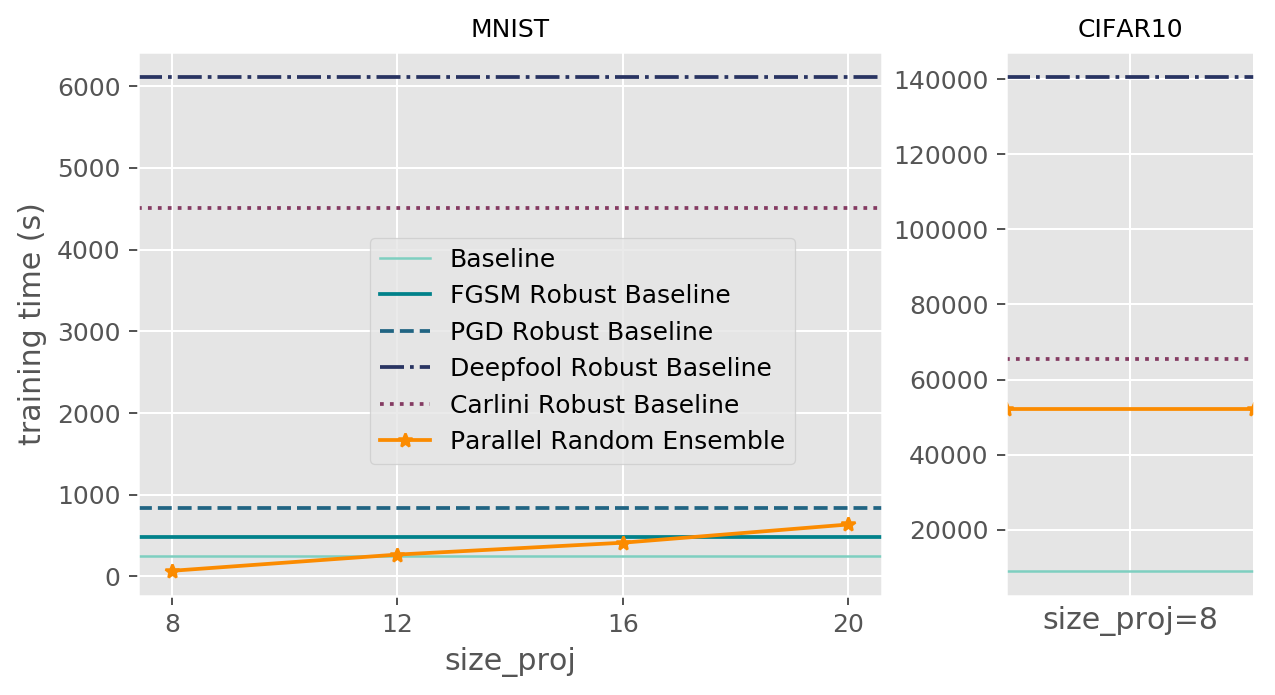

In [56]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, sharex=False, 
                               gridspec_kw={'width_ratios': [3, 1]}, 
                               dpi=180,
                               figsize=(8, 4))

# MNIST
# random ensemble accuracy vs evaluation set


# plain, fgsm, pgd, deepfool, carlini_linf
mnist_baseline = [244.64,486.45,833.16,6116.33,4507.31]
mnist_par_randens_times = [ 69.18349480628967,267.5957431793213,412.77997064590454,635.8284521102905]

x = range(4)
xlab=["8","12","16","20"]
ax1.axhline(y=mnist_baseline[0], color='#7ecfc0', label='Baseline', linewidth=1)
ax1.axhline(y=mnist_baseline[1], color="#00818a", label='FGSM Robust Baseline', ls="-")
ax1.axhline(y=mnist_baseline[2], color="#216583", label='PGD Robust Baseline', ls="--")
ax1.axhline(y=mnist_baseline[3], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax1.axhline(y=mnist_baseline[4], color="#843b62", label='Carlini Robust Baseline', ls=":")
ax1.plot(x,mnist_par_randens_times,color='#FB8B00',label='Parallel Random Ensemble', marker="*")
ax1.legend(bbox_to_anchor=(0.9, 0.45))
ax1.set_xlabel('size_proj')
ax1.set_ylabel('training time (s)')
ax1.set_xticks(x)
ax1.set_xticklabels(xlab)
ax1.set_title("MNIST",fontsize=10)

# CIFAR
cifar_baseline = [9049.866752386093,140696.0322291851,65423.28578591347 ]
cifar_par_randens_times = [52017.7775683403]
ax2.axhline(y=cifar_baseline[0], color='#7ecfc0', label='Baseline', linewidth=1)
ax2.axhline(y=cifar_baseline[1], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax2.axhline(y=cifar_baseline[2], color="#843b62", label='Carlini Robust Baseline', ls=":")
ax2.axhline(y=cifar_par_randens_times[0],color='#FB8B00',label='Parallel Random Ensemble', marker="*")

ax2.tick_params(axis='x',bottom=False,labelbottom=False)
ax2.set_xlabel('size_proj=8')
ax2.set_title("CIFAR10",fontsize=10)

fig.subplots_adjust(wspace=0.25)
fig.show()

## Cifar randreg

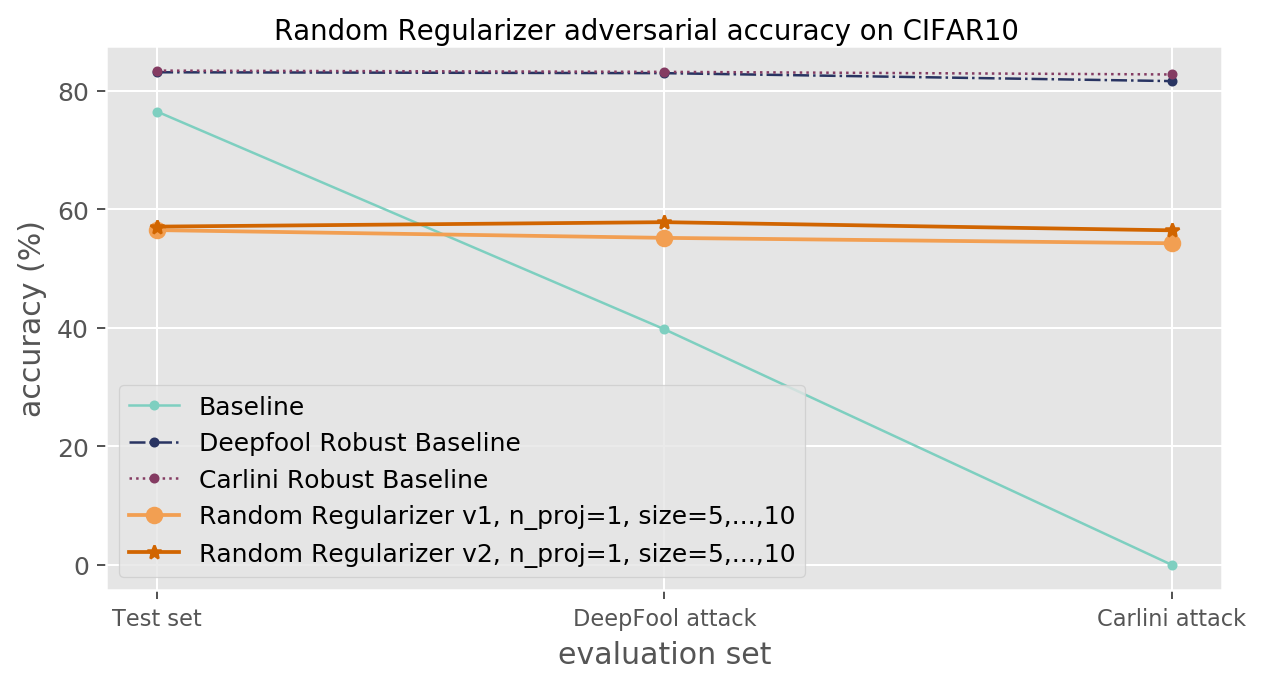

In [101]:
# random ensemble accuracy vs evaluation set
# test, deepfool, carlini_linf

baseline = [76.52, 39.77 ,  0.00]
deepfool_robust_baseline = [83.16, 83.01,   81.67]
carlini_robust_baseline = [83.44, 83.23 ,  82.79]

randreg_noproj_lam = [[51.93 ,  51.42  , 50.96 ]]
randreg_lossonproj_lam =[[56.51 ,  55.20,   54.29]]
randreg_projloss_lam =[[57.10  , 57.85 ,  56.47]]

randreg_noproj = np.mean(randreg_noproj_lam, axis=0)
randreg_lossonproj = np.mean(randreg_lossonproj_lam, axis=0)
randreg_projloss = np.mean(randreg_projloss_lam, axis=0)

xlab = ["Test set","DeepFool attack","Carlini attack"]
x = range(len(xlab))

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=False, figsize=(8, 4), dpi=180)
#plt.xticks(x, xlab, rotation=0) 
xticks_fontsize=9

ax.plot(x, baseline, color="#7ecfc0", label='Baseline', lw=1, marker='.')
ax.plot(x, deepfool_robust_baseline, color="#293462", label='Deepfool Robust Baseline', ls="-.",lw=1, marker='.')
ax.plot(x, carlini_robust_baseline, color="#843b62", label='Carlini Robust Baseline', ls=":",lw=1, marker='.')

#ax.plot(x,randreg_noproj,color="#f29f52",label='Random Regularizer v0', marker="^")
ax.plot(x,randreg_lossonproj,color="#f29f52",label='Random Regularizer v1, n_proj=1, size=5,...,10', marker="o") ##f37700
ax.plot(x,randreg_projloss,color="#d16500",label='Random Regularizer v2, n_proj=1, size=5,...,10', marker="*")
ax.set_xticks(x)
ax.set_xticklabels(xlab, fontsize=xticks_fontsize)
ax.legend(loc="lower left")#bbox_to_anchor=(0.72,0.6)) #loc="best"
#ax.set_title("no projections", fontdict={'fontsize': 10, 'fontweight': 'medium'}, loc='center',
#             bbox=dict(facecolor='white', alpha=0.5))

plt.ylabel('accuracy (%)', position=(0.5,0.5))
plt.xlabel('evaluation set', position=(0.5,0.8), fontsize=12)
fig.suptitle("Random Regularizer adversarial accuracy on CIFAR10", fontsize=11, y=0.92)
fig.show()

## projections

In [9]:
import sys
sys.path.insert(0, '../src')
from random_ensemble import *
from utils import *


In [7]:

dataset_name="cifar"
projection_mode="channels"

x_train, y_train, x_test, y_test, input_shape, num_classes, data_format = load_dataset(dataset_name, test=True)
augmented_inputs_list = []#np.array((4,100,input_shape[0],input_shape[1],input_shape[2]))

for size_proj in [3]:
    for n_proj in [15,18,20,23]:
        model = RandomEnsemble(input_shape=input_shape, num_classes=num_classes,
                                       n_proj=n_proj, size_proj=size_proj, projection_mode=projection_mode,
                                       data_format=data_format, dataset_name=dataset_name, test=True)

        projections, inverse_projections = model.compute_projections(input_data=x_test)
        perturbations, augmented_inputs = compute_perturbations(input_data=x_test, inverse_projections=inverse_projections)
        
        augmented_inputs_list += [augmented_inputs]
        
        print(len(augmented_inputs_list))


 === RandEns model ( n_proj =  15 , size_proj =  3 ) ===
Input shape:  (100, 32, 32, 3)

Computing  15 random projections in  channels mode: 
Projected data dimensions: (15, 100, 3, 3, 3)
1

 === RandEns model ( n_proj =  18 , size_proj =  3 ) ===
Input shape:  (100, 32, 32, 3)

Computing  18 random projections in  channels mode: 
Projected data dimensions: (18, 100, 3, 3, 3)
2

 === RandEns model ( n_proj =  20 , size_proj =  3 ) ===
Input shape:  (100, 32, 32, 3)

Computing  20 random projections in  channels mode: 
Projected data dimensions: (20, 100, 3, 3, 3)
3

 === RandEns model ( n_proj =  23 , size_proj =  3 ) ===
Input shape:  (100, 32, 32, 3)

Computing  23 random projections in  channels mode: 
Projected data dimensions: (23, 100, 3, 3, 3)
4


Text(0.5, 0, 'n_proj=23')

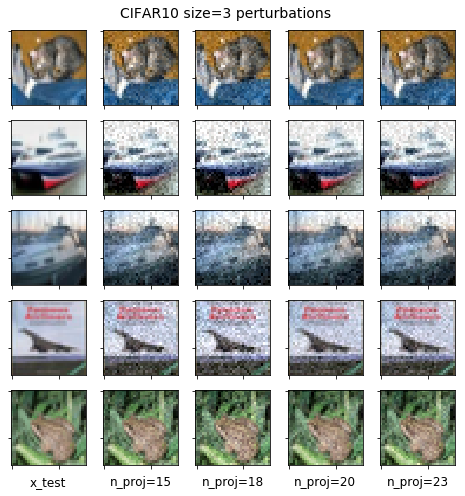

In [41]:
image_data_list = [x_test] + augmented_inputs_list
n_images = 5
fig, axs = plt.subplots(nrows=n_images, ncols=len(image_data_list), figsize=(8, 8))
fig.suptitle("CIFAR10 size=3 perturbations", fontsize=14, y=0.92)

for group in range(len(image_data_list)):
    for im_idx in range(n_images):
        axs[im_idx, group].imshow(np.squeeze(image_data_list[group][im_idx]), cmap=None)
        axs[im_idx, group].set_xticklabels([])
        axs[im_idx, group].set_yticklabels([])

fontsize=12
axs[4,0].set_xlabel('x_test', fontsize=fontsize)
axs[4,1].set_xlabel('n_proj=15', fontsize=fontsize)
axs[4,2].set_xlabel('n_proj=18', fontsize=fontsize)
axs[4,3].set_xlabel('n_proj=20', fontsize=fontsize)
axs[4,4].set_xlabel('n_proj=23', fontsize=fontsize)

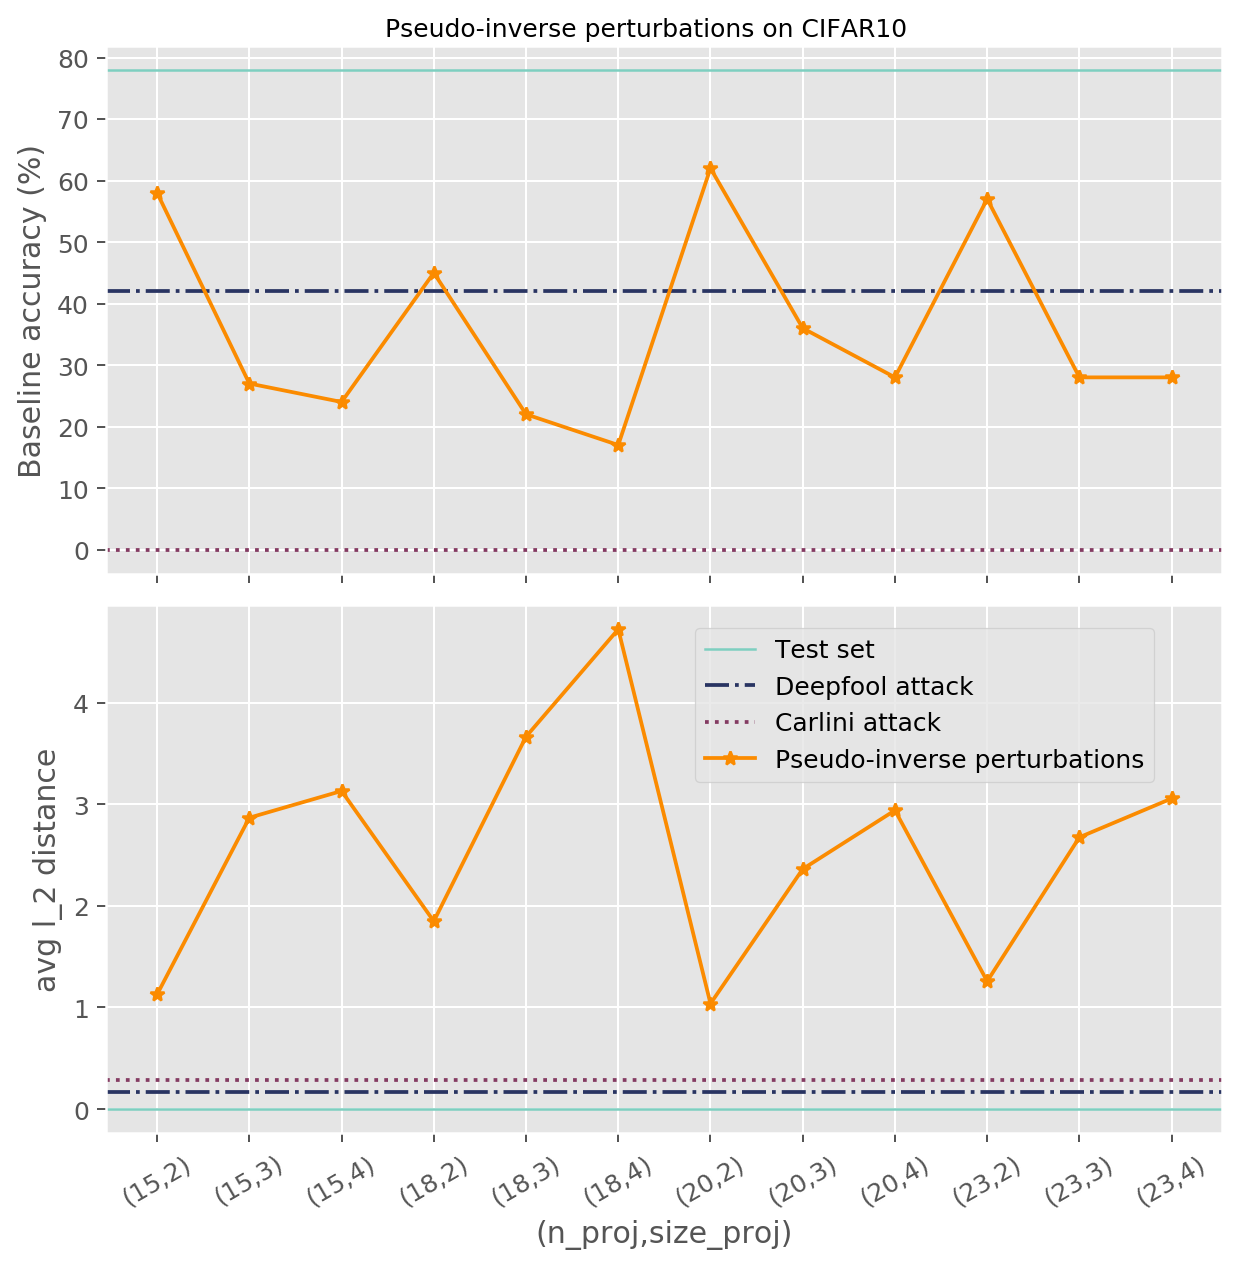

In [69]:
# random ensemble accuracy vs evaluation set
                                                                  
                                                                  
xlab = ["(15,2)","(15,3)","(15,4)",
        "(18,2)","(18,3)","(18,4)",
        "(20,2)","(20,3)","(20,4)",
        "(23,2)","(23,3)","(23,4)"
       ]
x = range(12)

# test, deepfool, carlini
baseline_attacks = [78.00, 42.00, 00.00]
# pinv perturbations
baseline_perturbations = [58.00, 27.00, 24.00,45.00, 22.00,17.00,62.00, 36.00, 28.00, 57.00, 28.00,28.00]

attacks_distance =[ 0, 0.1663116, 0.28179914 ]
perturbations_distance = [ 1.1286917806680676, 
 2.868713534736674 , 
 3.1318220120346125, 
 1.8489395298704383, 
 3.66660598482421  , 
 4.72443073913854  , 
 1.0379053660635298, 
 2.3631074024870107, 
 2.9413540172409274, 
 1.2579681346768858, 
 2.6761175713366248, 
 3.0580921535266     ] 

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 8), dpi=180)

# baseline accuracy on eval set
ax1.axhline(y=baseline_attacks[0], color='#7ecfc0', label='Test set', linewidth=1)
ax1.axhline(y=baseline_attacks[1], color="#293462", label='Deepfool attack', ls="-.")
ax1.axhline(y=baseline_attacks[2], color="#843b62", label='Carlini attack', ls=":")
ax1.plot(x,baseline_perturbations,color='#FB8B00',label='Pseudo-inverse perturbations', marker="*")
ax1.set_ylabel('Baseline accuracy (%)')

# average distance

ax2.axhline(y=attacks_distance[0], color='#7ecfc0', label='Test set', linewidth=1)
ax2.axhline(y=attacks_distance[1], color="#293462", label='Deepfool attack', ls="-.")
ax2.axhline(y=attacks_distance[2], color="#843b62", label='Carlini attack', ls=":")
ax2.plot(x,perturbations_distance,color='#FB8B00',label='Pseudo-inverse perturbations', marker="*")
ax2.set_ylabel('avg l_2 distance')

plt.xlabel('(n_proj,size_proj)')
fig.subplots_adjust(hspace=0.06)
plt.xticks(x, xlab, rotation=30) 
plt.legend(loc='best', bbox_to_anchor=(0.95,0.98))

#ax4.legend(loc='best', title="Carlini l_inf attack")#,bbox_to_anchor=(0.65, 0., 0.5, 0.5))
#ax4.set_title("Carlini l_inf attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.12, y=0.75,          bbox=dict(facecolor='white', alpha=0.5))

fig.suptitle("Pseudo-inverse perturbations on CIFAR10", fontsize=10, y=0.9)
fig.show()

## loss

In [38]:
import sys
sys.path.append("../src/")
import utils
from baseline_convnet import BaselineConvnet
from keras.models import load_model
from art.classifiers import TFClassifier
from utils import *

# load models
x_train, y_train, x_test, y_test, input_shape, num_classes = preprocess_mnist()

model = BaselineConvnet(input_shape=input_shape, num_classes=num_classes)

#baseline_classifier = model.load_classifier(relative_path="../trained_models/IBM-art/mnist_cnn_robust.h5")

baseline = model.load_classifier("../trained_models/baseline/baseline.h5")


Loading mnist.
x_train shape: (60000, 28, 28, 1) 
x_test shape: (10000, 28, 28, 1)

Loading the model.


In [59]:
baseline.loss_gradient

<bound method KerasClassifier.loss_gradient of art.classifiers.keras.KerasClassifier(clip_values=(0, 255), model=<keras.engine.training.Model object at 0x7fae6e2cb518>, use_logits=False, channel_index=3, defences=None, preprocessing=(0, 1), input_layer=0, output_layer=0, custom_activation=False)>

In [ ]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

# summarize history for loss
plt.plot(loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# list all data in history
print(baseline_classifier.history.keys())
# summarize history for accuracy
plt.plot(baseline_classifier.history['acc'])
plt.plot(baseline_classifier.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

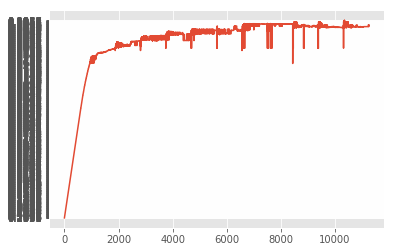

In [2]:
with open('../trained_models/baseline/log_files/pgd_advtraining_plot.txt') as f:
    lines = f.readlines()
    loss = [line.split()[0] for line in lines]
    acc = [line.split()[1] for line in lines]
plt.plot(acc)
plt.show()